# Image Processing for Computer Vision

<a id="0"></a> <br>
## Table of Contents
1. [Imports](#1)
1. [Reading Images](#2)

<a id="1"></a>
### 1. Imports
[Back to top](#0)


In [16]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path

%matplotlib inline

<a id="2"></a>
### 1. Reading Images
[Back to top](#0)

Unassigned 16 bit image 0-65535 

Unassigned 8 bit image 0-255


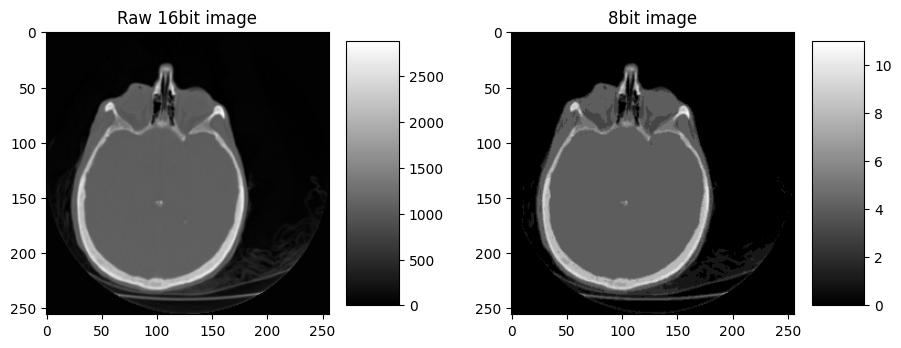

In [98]:
# Getting local files
folder = Path('cthead-16bit')
images = [folder.joinpath(file) for file in os.listdir(folder)]

# Read a middle of the pack slice
img_slice = 45
raw_image = cv2.imread(images[img_slice].as_posix(), cv2.IMREAD_UNCHANGED) # 8bit
gray_image = cv2.imread(images[img_slice].as_posix(), cv2.IMREAD_GRAYSCALE) # 16bit

# display images
def setup_plots(n_subplots):
    fig, ax = plt.subplots(1, n_subplots, figsize=(10, 10), gridspec_kw={'width_ratios': [2, 2]})
    fig.set_figheight(5)
    fig.tight_layout(pad=5.0)
    return fig, ax

def display(ax, data, title):
    image = ax.imshow(data, cmap='gray')
    fig.colorbar(image, ax=ax, orientation='vertical', aspect=5)
    ax.title.set_text(title)

fig, ax = setup_plots(2)
display(ax[0], raw_image, 'Raw 16bit image')
display(ax[1], gray_image, '8bit image')

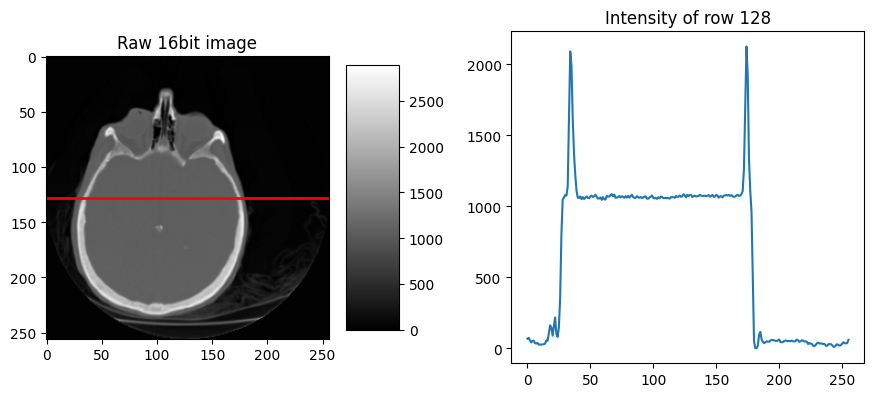

In [99]:
fig, ax = setup_plots(2)
display(ax[0], raw_image, 'Raw 16bit image')

# Add line to the images
n_cols = raw_image.shape[0]
middle_row = np.multiply(raw_image.shape[1], 0.5)
row_position = int(np.rint(middle_row))
col_numbers = (0, n_cols-1) # These are x values
row_numbers = (row_position, row_position) # These are y values
ax[0].plot(col_numbers, row_numbers, color='red', linewidth=2)

# Plot the data across that line
line_x = np.arange(0, n_cols)
line_y = raw_image[row_position, :] # Extract single row
ax[1].plot(line_x, line_y)
ax[1].title.set_text(f'Intensity of row {row_position}')